In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
import sklearn.gaussian_process as gp
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
import catboost as cb
import lightgbm as lgb
import shap

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

c:\Users\Dell\anaconda3\envs\lipu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def data_load():
    data=pd.read_csv('./use.csv')
    train_data,test_data=train_test_split(data,test_size=0.2, random_state=1314)
    feature=train_data.drop(['Sel'],axis=1)
    label=train_data['Sel']
    return feature,label,test_data

In [3]:
kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)
log_param1 = [1e-2, 1e-1, 1.0, 10, 1e2]
log_param2 = [1.0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
log_param3 = [1.0, 10, 1e2, 1e3, 1e4, 1e5]

In [4]:
model=['LightGBM','AdaBoost','Catboost','Lasso','Ridge','GPR','SVR','RFR','ETR','XGB']
r2=[]
rmse=[]
feat, target ,test_data = data_load()

In [5]:
feat.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
# LightGBM
cvmodel = GridSearchCV(lgb.LGBMRegressor(random_state=1314,iterations=500,lambda_l2=3.5,verbose=-1,learning_rate= 0.4),
                       param_grid={'max_depth':[10,30]},
                       n_jobs = -1)
print('LightGBM:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

LightGBM:
r2: 0.7070437108932413
rmse: 11.625460608869322
----------------


In [7]:

#AdaBoost
cvmodel = GridSearchCV(AdaBoostRegressor( random_state = 1314,learning_rate=2),
                        param_grid = {'n_estimators':[100,300,500, 1000]},
                        n_jobs = -1)
print('AdaBoost:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

AdaBoost:
r2: 0.40789193031924575
rmse: 16.647001269884065
----------------


In [8]:
# CatBoost
cvmodel = GridSearchCV(cb.CatBoostRegressor(random_state=1314,iterations=500,silent=True,learning_rate=0.1),
                       param_grid={'depth':[1,10]},
                       n_jobs = -1)
print('Catboost:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

Catboost:
r2: 0.7876535562569209
rmse: 9.879866091490637
----------------


In [9]:
#Lasso
cvmodel = GridSearchCV(Lasso(),
                        param_grid = {'alpha': log_param1},
                        n_jobs = -1)
print('Lasso:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')


Lasso:
r2: 0.48653357039777656
rmse: 15.424993073920982
----------------


In [10]:

#Ridge
cvmodel = GridSearchCV(Ridge(),
                        param_grid = {'alpha': log_param1},
                        n_jobs = -1)
print('Ridge:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

Ridge:
r2: 0.4839071018635561
rmse: 15.431127487780742
----------------


In [11]:

#GPR
kernel = gp.kernels.Matern(nu = 2.5)
cvmodel = GridSearchCV(gp.GaussianProcessRegressor(kernel = kernel,
                                                    normalize_y = True,
                                                    n_restarts_optimizer = 10,
                                                    random_state = 1314),
                        param_grid = {'alpha':log_param2},
                        n_jobs = -1)
print('GPR:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

GPR:
r2: 0.36710960512144614
rmse: 17.195753582077664
----------------


In [12]:

#SVR
cvmodel = GridSearchCV(SVR(kernel = 'rbf'),
                        param_grid = {'C': log_param3,
                                        'gamma':log_param2,
                                        'epsilon':log_param1},
                        n_jobs = -1)
print('SVR:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')


SVR:
r2: 0.47947171566364705
rmse: 15.55168125767764
----------------


In [13]:

#RFR
cvmodel = GridSearchCV(RandomForestRegressor(n_jobs = -1, random_state = 1314),
                        param_grid = {'n_estimators':[500, 1000]},
                        n_jobs = -1)
print('RFR:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

RFR:
r2: 0.7196213521561109
rmse: 11.38919956130538
----------------


In [14]:

#ETR
cvmodel = GridSearchCV(ExtraTreesRegressor(n_jobs = -1, random_state = 1314),
                        param_grid = {'n_estimators':[500, 1000]},
                        n_jobs = -1)
print('ETR:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

ETR:
r2: 0.7630059325623857
rmse: 10.447061952079464
----------------


In [15]:

#XGB
cvmodel = GridSearchCV(XGBRegressor(n_jobs = -1, random_state = 1314,learning_rate=0.1),
                        param_grid = {'n_estimators':[300, 500],'max_depth':[2,3,4,5,6,7,8,9,10]},
                        n_jobs = -1)
print('XGB:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

XGB:
r2: 0.726585829869365
rmse: 11.176148046340701
----------------


In [16]:
model=['LGBM','Ada','Cat','Lasso','Ridge','GPR','SVR','RFR','ETR','XGB']
c={'model' : model,
   'R2' : r2,
   'RMSE' : rmse
   }
final=pd.DataFrame(c)
final

,model,R2,RMSE
0,LGBM,0.707044,11.625461
1,Ada,0.407892,16.647001
2,Cat,0.787654,9.879866
3,Lasso,0.486534,15.424993
4,Ridge,0.483907,15.431127
5,GPR,0.367110,17.195754
6,SVR,0.479472,15.551681
7,RFR,0.719621,11.389200
8,ETR,0.763006,10.447062
9,XGB,0.726586,11.176148


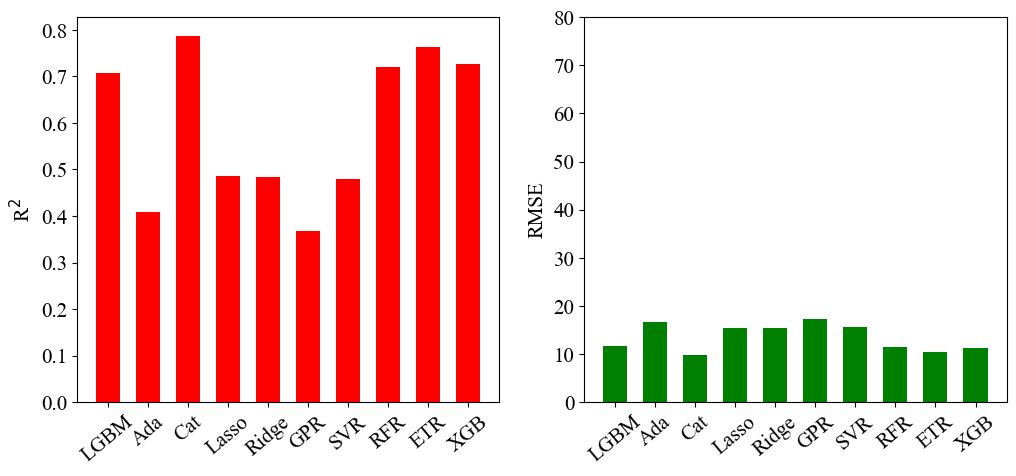

In [21]:
from pathlib import Path
fig,axs=plt.subplots(1,2,figsize=(12,5))
# fig.suptitle('硼基催化剂中中各个模型拟合效果评估',y=0)

axs[0].bar(final.iloc[:,0],final.iloc[:,1],width=0.6,fc='r')
axs[0].set_ylabel('R$^2$',font=Path('..\TimesNewRoman.ttf'),fontsize=15)
x1_label = axs[0].get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
[x1_label_temp.set_fontsize(15) for x1_label_temp in x1_label]
[x1_label_temp.set_rotation(40) for x1_label_temp in x1_label]
y1_label = axs[0].get_yticklabels() 
[y1_label_temp.set_fontsize(15) for y1_label_temp in y1_label]
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
axs[1].bar(final.iloc[:,0],final.iloc[:,2],width=0.6,fc='g')
axs[1].set_ylabel('RMSE',font=Path('..\TimesNewRoman.ttf'),fontsize=15)
x2_label = axs[1].get_xticklabels() 
[x2_label_temp.set_fontname('Times New Roman') for x2_label_temp in x2_label]
[x2_label_temp.set_fontsize(15) for x2_label_temp in x2_label]
[x2_label_temp.set_rotation(40) for x2_label_temp in x2_label]
y2_label = axs[1].get_yticklabels() 
[y2_label_temp.set_fontname('Times New Roman') for y2_label_temp in y2_label]
[y2_label_temp.set_fontsize(15) for y2_label_temp in y2_label]
axs[1].set_ylim(0,80)
plt.show()

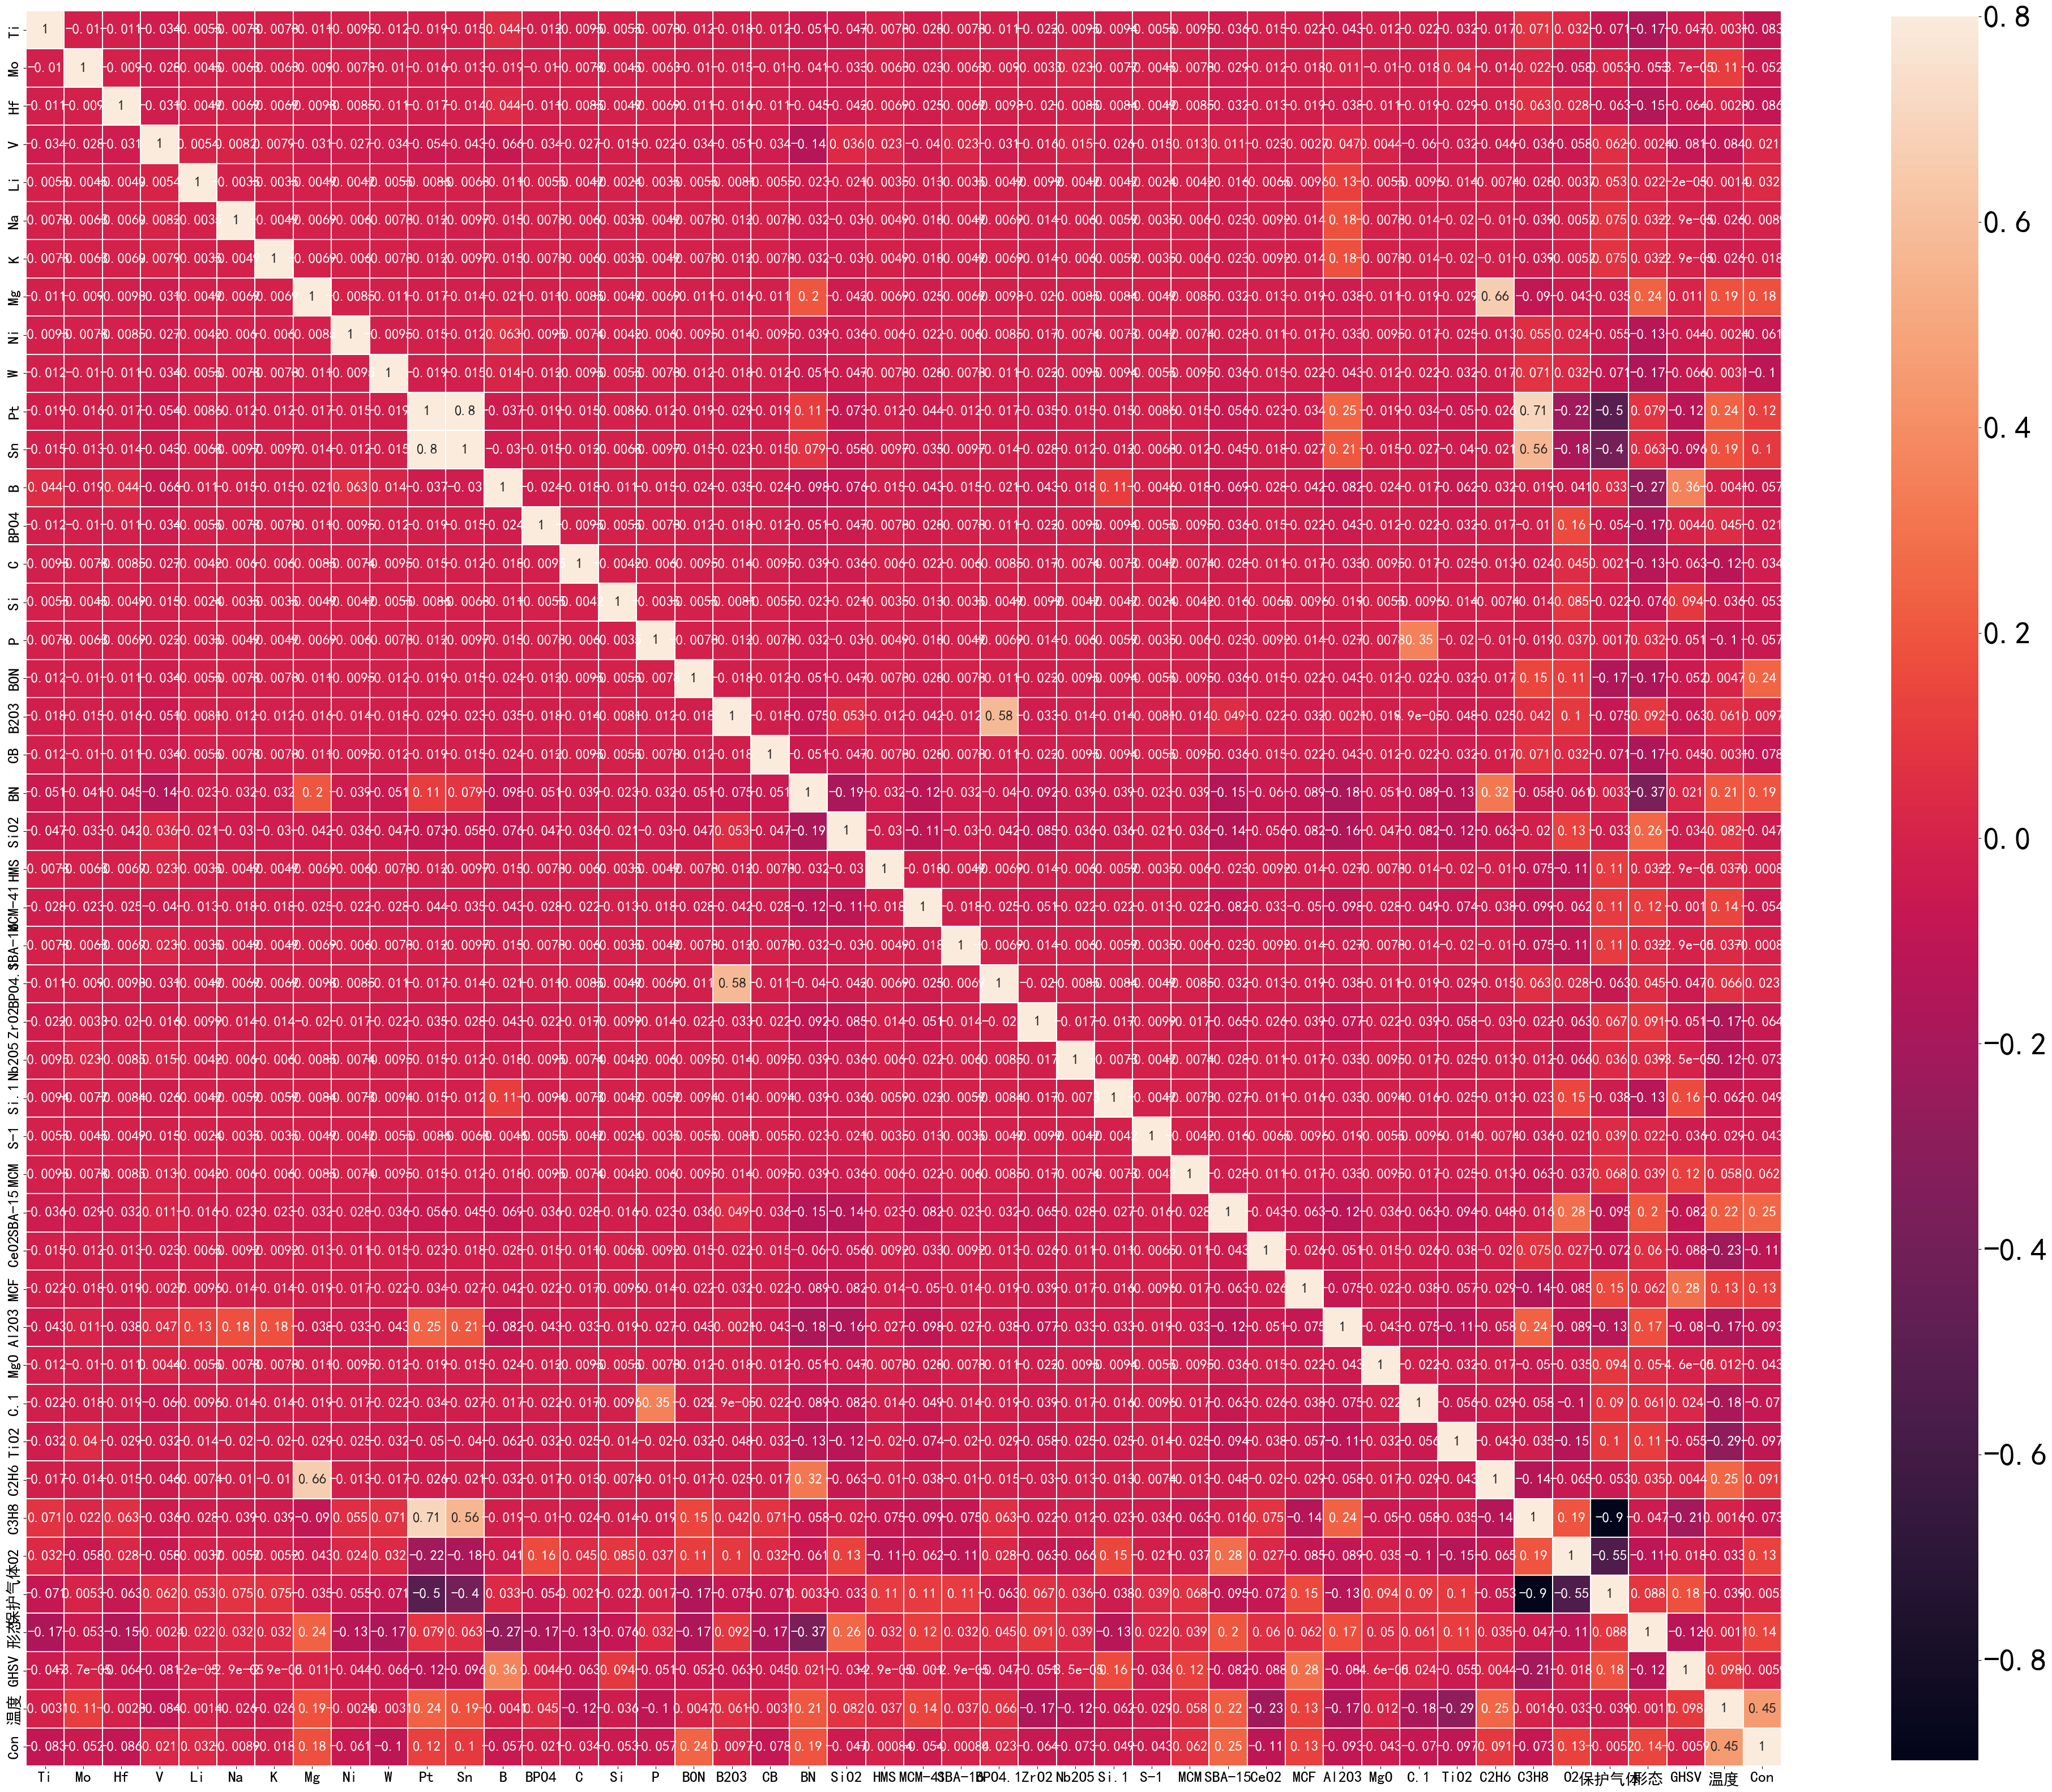

In [18]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(feat.corr(method='pearson'),linewidths=0.1,vmax=0.8, square=True,linecolor='white', 
            annot=True,annot_kws={'fontsize':18},cbar=True,cbar_kws={"shrink": 0.8})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('皮尔逊热力图',fontsize=80)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=40)
plt.show()

In [19]:
model_1=['LightGBM','XGBoost','CatBoost','ETR','RFR']
Time=[0.4,43.1,48.9,52.1,81.5]
s_1={'model':model_1,
     'Time':Time}
s_1=pd.DataFrame(s_1)
s_1

,model,Time
0,LightGBM,0.4
1,XGBoost,43.1
2,CatBoost,48.9
3,ETR,52.1
4,RFR,81.5


C:\Users\Dell\AppData\Local\Temp\ipykernel_31696\803062735.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y="Time", data=s_1,palette='Blues_d',width=0.6)


Text(0, 0.5, 'Time/s')

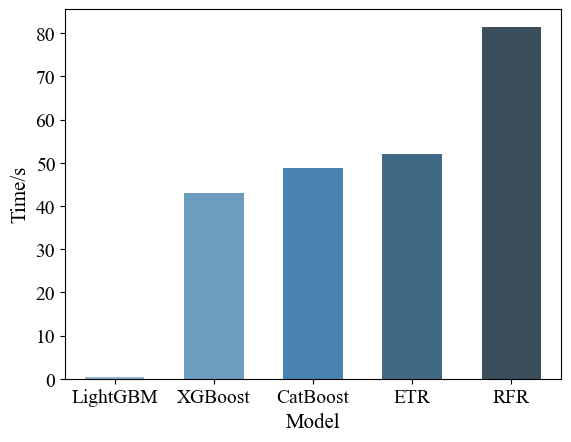

In [20]:
sns.barplot(x="model", y="Time", data=s_1,palette='Blues_d',width=0.6)
plt.xticks(fontsize=14,fontname='Times New Roman')
plt.yticks(fontsize=14,fontname='Times New Roman')
plt.xlabel('Model',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('Time/s',fontsize=15,font=Path('..\TimesNewRoman.ttf'))